# **Heart Disease Classification**

#### Muhammad Hendrawan Hidayat - Intermediate Machine Learning (Batch 6)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.optimizers import SGD, RMSprop, Adam, Adamax
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
plt.style.use('seaborn')

### Data Understanding

### Data Loading

In [4]:
missing_values = ["?", "--"]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                 names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
                 na_values = missing_values)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
print('Jumlah Data=', df.shape[0])
print('Jumlah Features =', df.shape[1])

Jumlah Data= 303
Jumlah Features = 14


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


### Handling Missing Value

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [10]:
df.dropna(axis=0, how='any', inplace = True)

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
print('Jumlah Data=', df.shape[0])
print('Jumlah Features =', df.shape[1])

Jumlah Data= 297
Jumlah Features = 14


### Explore Data

In [13]:
# Checking Target Number

df['target'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [14]:
# Define Target Data Into 2 Class

df["target"] = np.where(df["target"] > 0, 1, 0)

In [15]:
df['target'].unique()

array([0, 1])

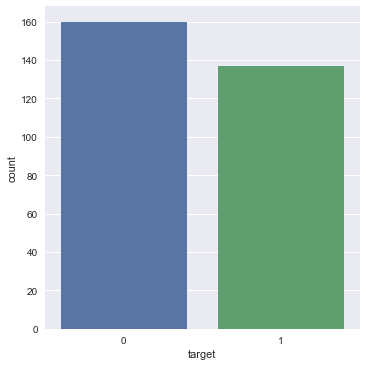

In [16]:
# Target Distribution

sns.catplot(x = 'target',
          data = df, kind = 'count')

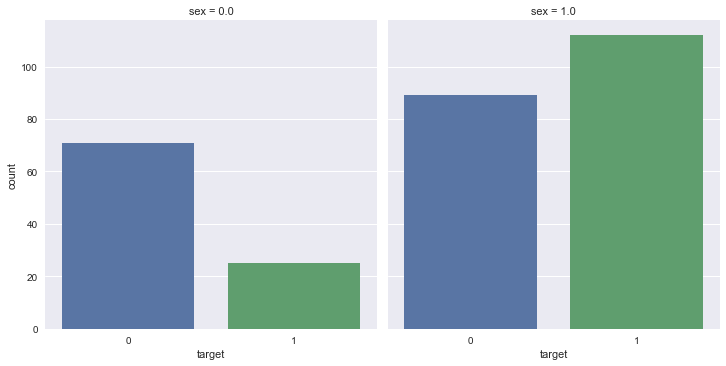

In [17]:
# Target over Sex Distribution

sns.catplot(x = 'target', col = 'sex',
          data = df, kind = 'count')

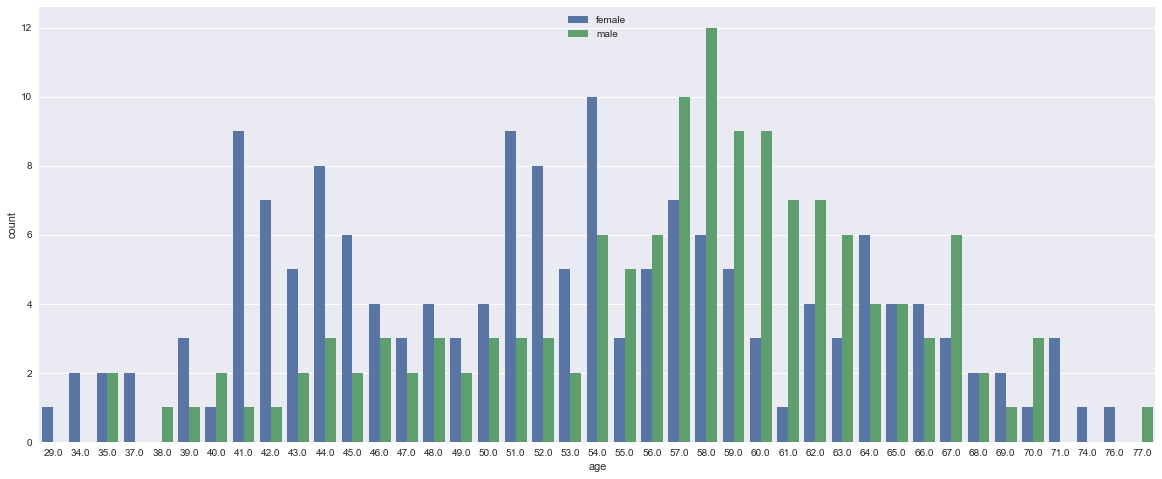

In [18]:
# Target over Sex Distribution

plt.figure(figsize=(20,8))
sns.countplot(x = 'age', hue = 'target',
          data = df)
plt.legend(['female', 'male'])

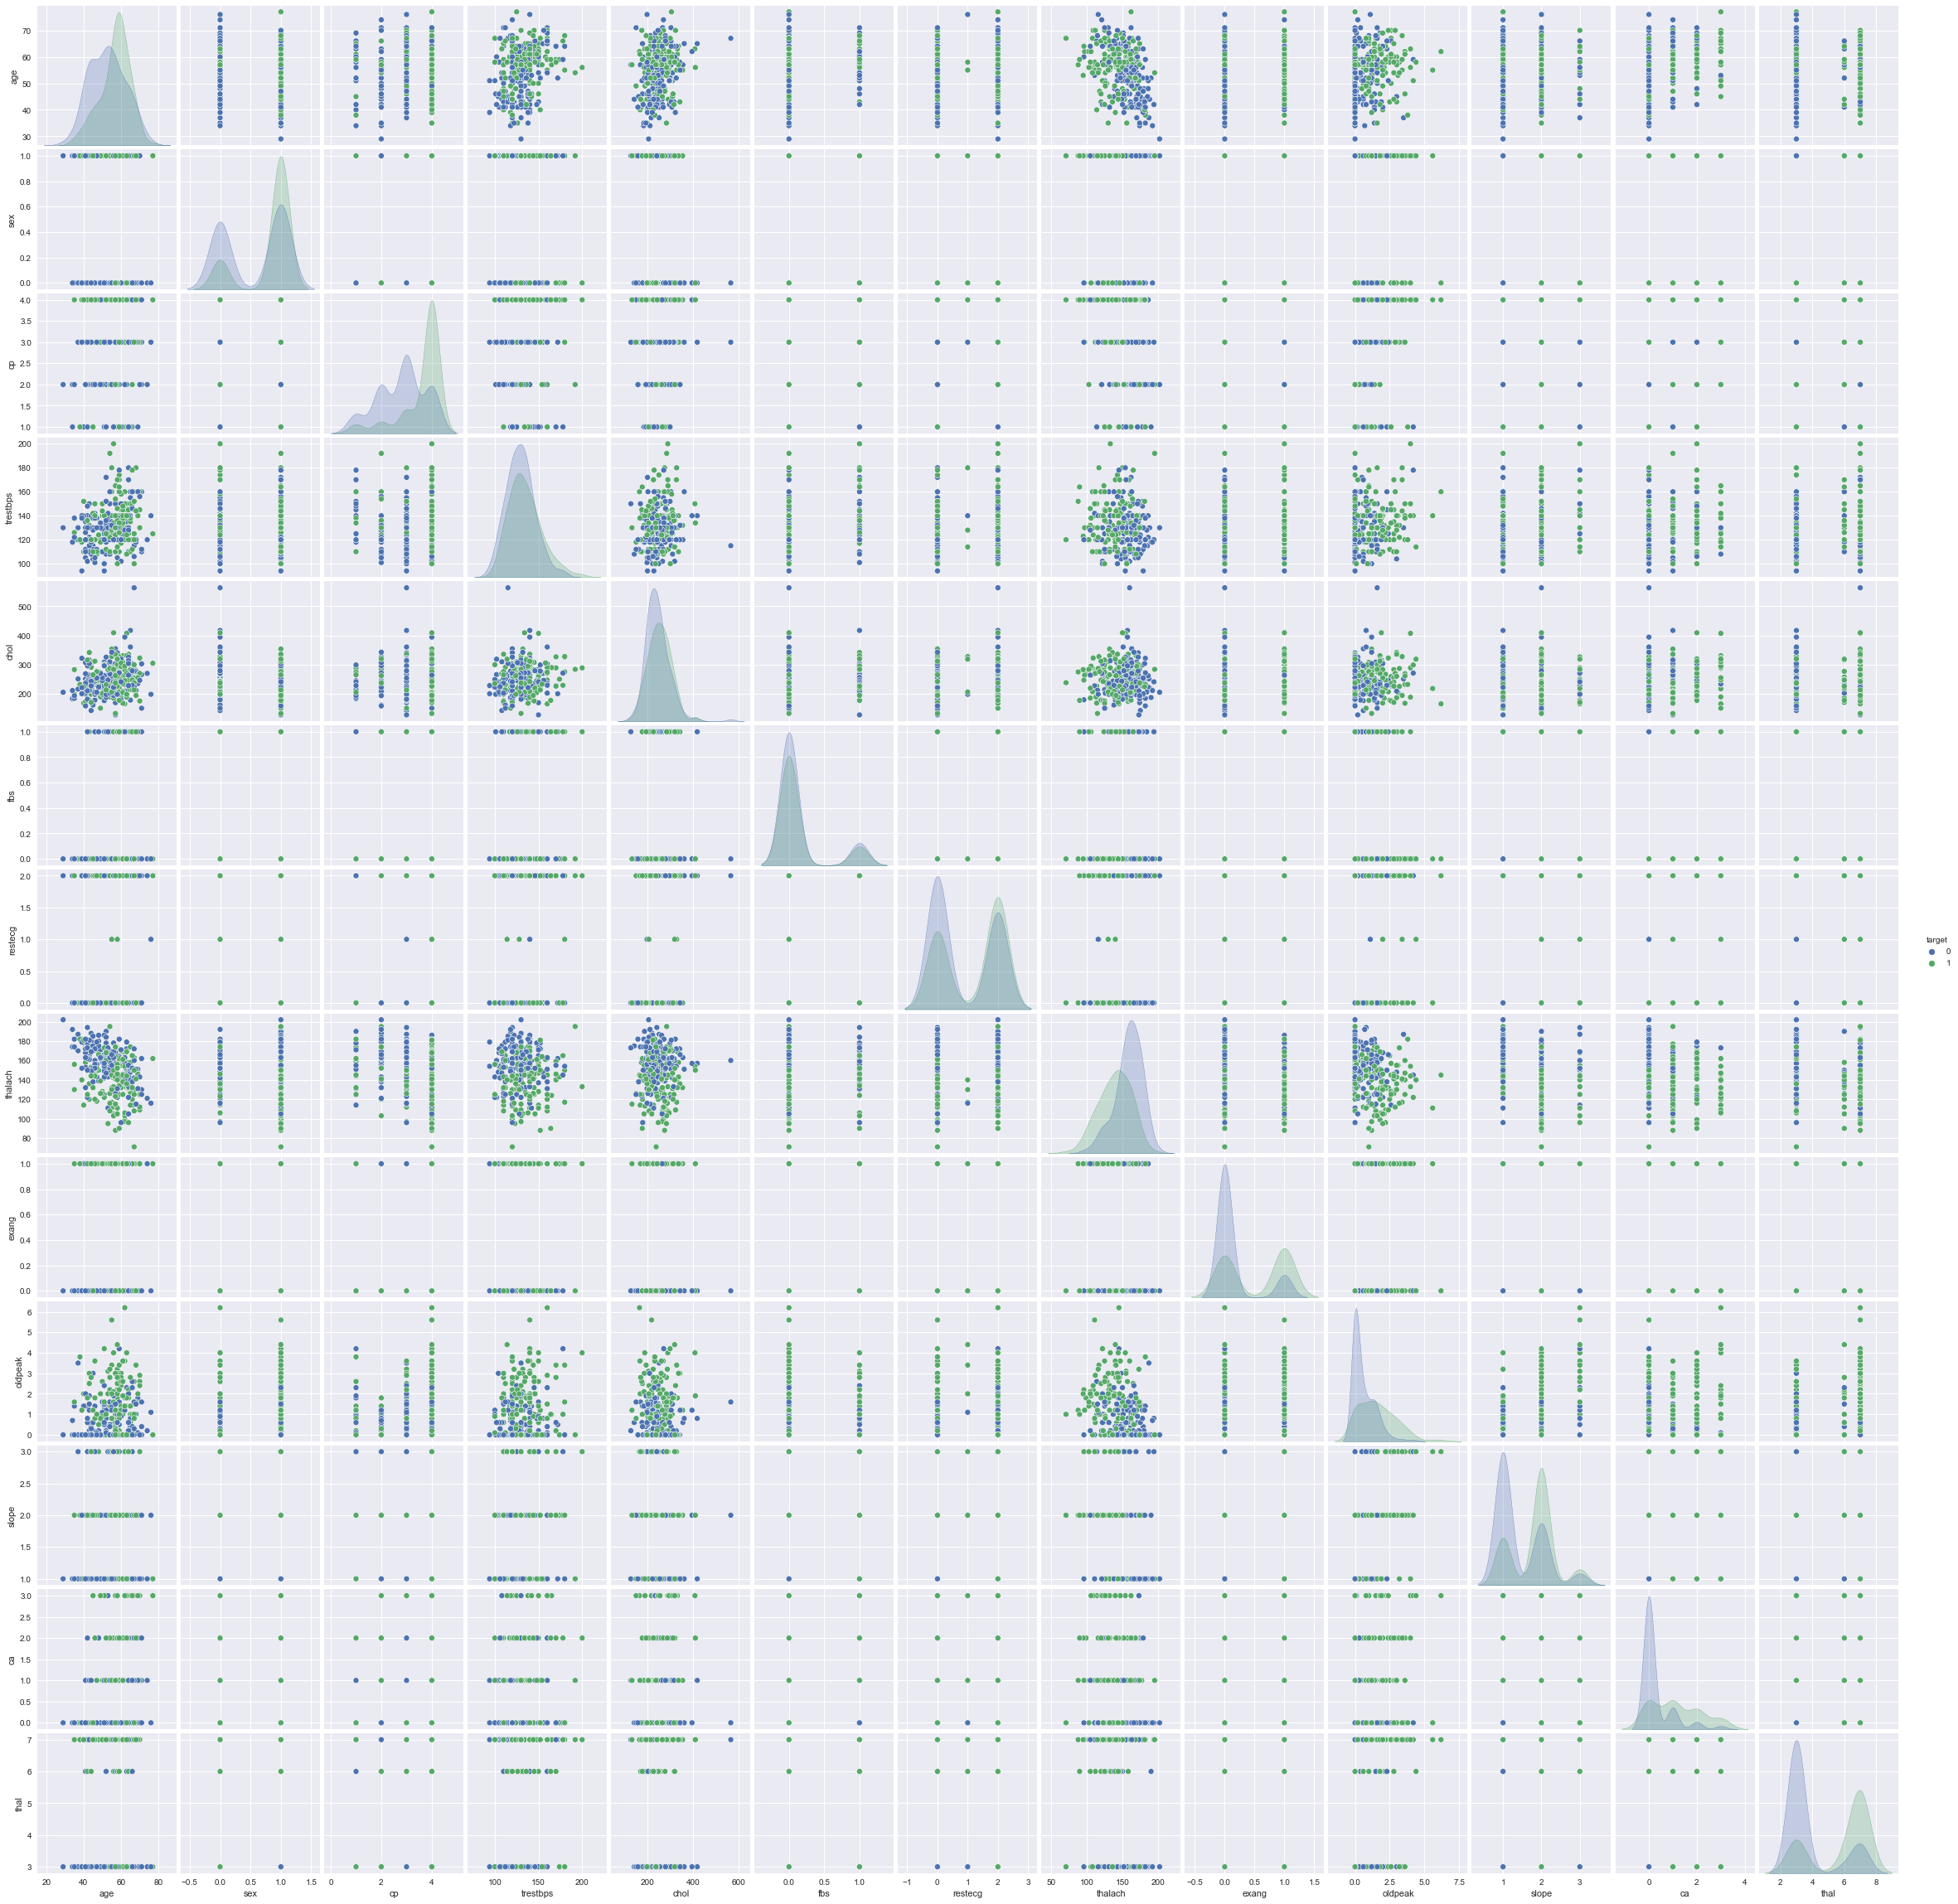

In [19]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

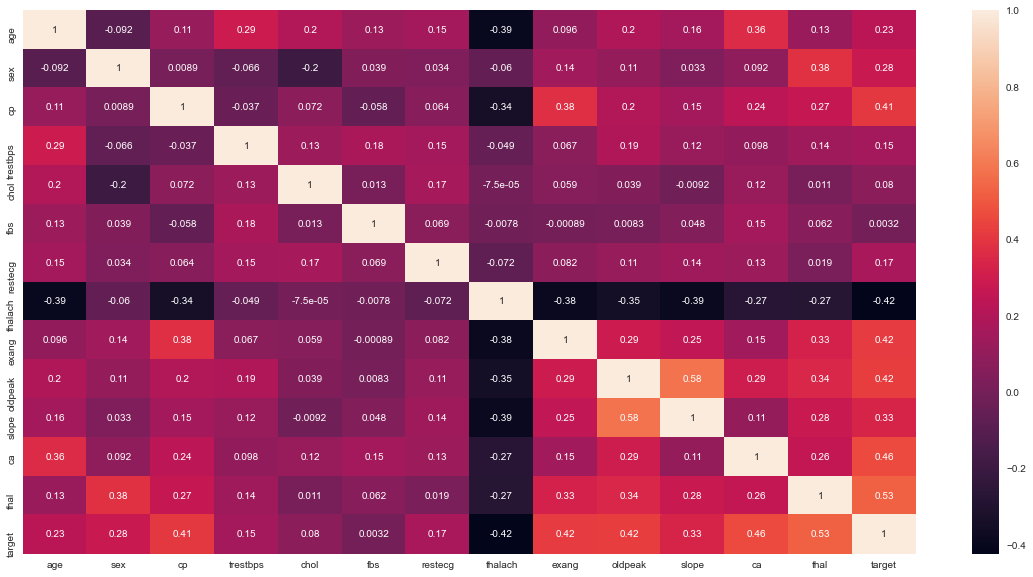

In [20]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

### Feature Selection

In [21]:
feature = df.drop('target', axis=1)

In [22]:
label = df['target']

In [48]:
# Sorting Correlation Among Features to Target

feature_corr = abs(corr['target']).sort_values(ascending=False)
feature_corr

target      1.000000
thal        0.526640
ca          0.463189
oldpeak     0.424052
thalach     0.423817
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
Name: target, dtype: float64

In [49]:
# Drop < 0.2 Correlation Features

feature.drop(['restecg', 'trestbps', 'chol', 'fbs'], axis=1, inplace = True)

### Dataset Splitting

In [50]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2, random_state = 20)

## **Experiment**

### First Experiment

First experiments will train models with 32 batch size over 50, 100, 150, 200, 250, 300, 350, and 400 epochs.

In [93]:
# fit a model and plot learning curve

def fit_first_model(x_train, y_train, x_test, y_test, epoch):
    
    # define model
    first_model = Sequential()
    first_model.add(Dense(32, input_dim=9, activation='relu', kernel_initializer='he_uniform'))
    first_model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    optimizer = RMSprop(lr= 0.01, momentum = 0.9)
    first_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # fit model
    history = first_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=32, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(epoch))
    plt.legend()

In [94]:
# create learning curves for different epochs

epoch = [50, 100, 150, 200, 250, 300, 350, 400]

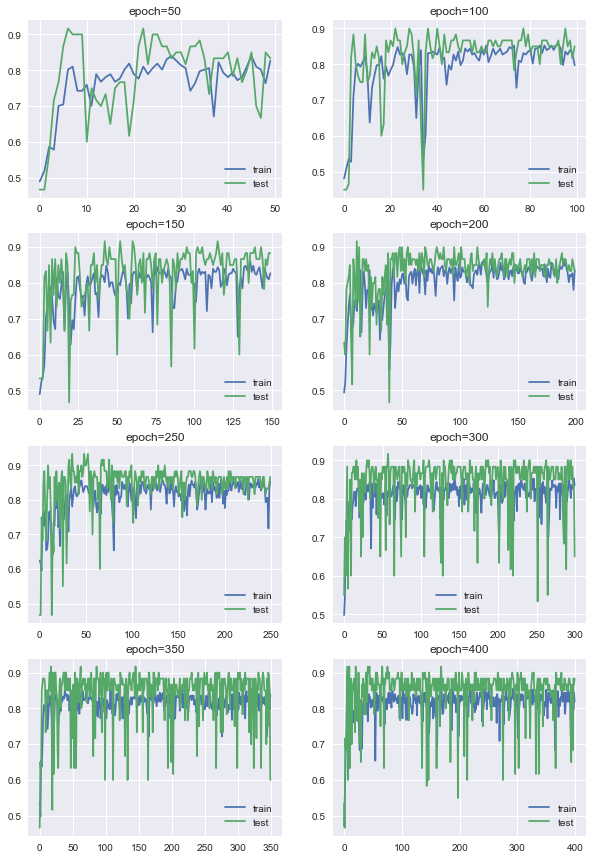

In [95]:
plt.figure(figsize=(10, 15))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(x_train, y_train, x_test, y_test, epoch[i])

# show learning curves
plt.show()

#### First Experiment Summary

Berdasarkan hasil eksperimen yang telah dilakukan, dapat diketahui bahwa : 

1. Epoch yang besar tidak selalu akan menghasilkan model yang baik, dapat dilihat pada grafik learning curve diatas bahwa mulai dari epoch 300 - 400, learning curve sudah semakin volatile dan accuracy antara train dan test semakin berbeda, hal ini mengindikasikan bahwa kemungkinan model akan menjadi overfitting.

2. Sebaliknya, epoch yang kecil juga tidak selalu akan menghasilkan model yang baik, karena dapat dilihat pada grafik learning curve diatas bahwa mulai dari epoch 50-150, model masih belum cukup untuk belajar dan accuracy antara train dan test masih cukup berbeda, hal ini mengindikasikan bahwa kemungkinan model masih underfitting.

3. Menentukan epoch yang optimal dapat dilihat dari kondisi learning curve yang convergence dengan nilai accuracy antara train dan test yang tidak berbeda jauh, dalam eksperimen ini epoch 200-250 merupakan epoch yang terlihat optimal.

### Second Experiment

Second experiments will train models with 250 epoch over 1, 8, 16, 32, 64, 128, 256, and total training number batch sizes.

In [98]:
# fit a model and plot learning curve

def fit_second_model(x_train, y_train, x_test, y_test, batch):
    
    # define model
    second_model = Sequential()
    second_model.add(Dense(32, input_dim=9, activation='relu', kernel_initializer='he_uniform'))
    second_model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    optimizer = RMSprop(lr= 0.01, momentum = 0.9)
    second_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # fit model
    history = second_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=250, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch size='+str(batch))
    plt.legend()

In [99]:
# create learning curves for different batch sizes

batch = [1, 8, 16, 32, 64, 128, 256, len(x_train)]

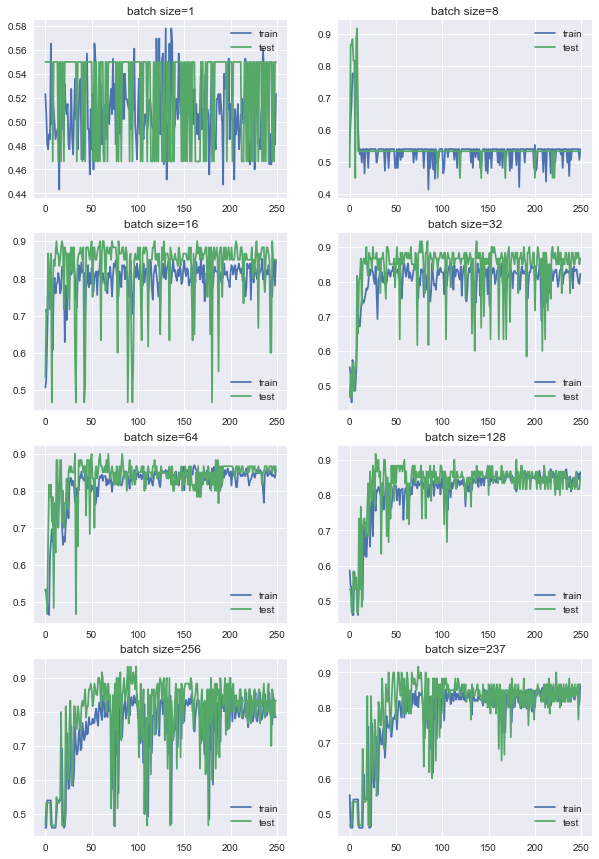

In [100]:
plt.figure(figsize=(10, 15))
for i in range(len(batch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(x_train, y_train, x_test, y_test, batch[i])

# show learning curves
plt.show()

#### Second Experiment Summary

Berdasarkan hasil eksperimen yang telah dilakukan, dapat diketahui bahwa : 

1. Batch size yang kecil seperti batch size 1-32 akan menyebabkan learning curve menjadi sangat volatile, karena model hanya akan menentukan wwight berdasarkan sedikit data sample sehingga akan terjadi perubahan accuracy yang cukup signifikan di setiap epochnya.

2. Semakin besar batch size, akan meminimalisir fluktuasi pada learning curve karena model menentukan weight berdasarkan banyak data sample, namun constraintnya adalah komputasi yang dilakukan akan sangat berat.

3. Berdasarkan hasil eksperimen ini, dapat diketahui batch size yang optimal berada diantara 64-128 karena tingkat volatile yang rendah dengan batch size yang tidak terlalu besar sehingga tidak perlu melakukan komputasi yang terlalu berat.

### Optimal Model

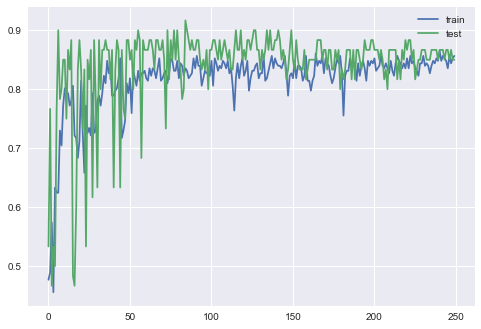

In [107]:
# define model
model = Sequential()
model.add(Dense(32, input_dim=9, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
  
# compile model
optimizer = RMSprop(lr= 0.01, momentum = 0.9)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
# fit model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=250, batch_size=64, verbose=0)

# plot learning curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

In [108]:
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, valid_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.840, Valid: 0.850
